# Advance 자료 1: Mixup

여기의 세가지 기술을 Image 분야에서 최근 각광받은 기술입니다.

특히, Image Classification의 신경망의 성능을 올리기 위한 몇가지 심화 기술들입니다.

Image Classification의 신경망 성능을 올리는 것은 Object detection과 semantic segmentation으로의 transfering에서의 성능 향상으로도 이어질 수 있기에 굉장히 중요합니다.

그럼 몇가지 기술들을 소개 드리겠습니다.

`Mixup`은 Data에 dependent한 augmentation 기법입니다.

두 데이터의 이미지와 label을 각각 weighted linear interpolation하여서 새로운 instance (이미지)를 생성하는 기법입니다.

논문은 https://arxiv.org/pdf/1710.09412.pdf 입니다.

![mixup](./imgs/mixup.png)

In [34]:
import torch
import copy
from torch import cuda, nn
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def mixup(images, labels, device, alpha=1.0):
    """
    mixup function from 'mixup: BEYOND EMPIRICAL RISK MINIMIZATION', 
    https://arxiv.org/pdf/1710.09412.pdf
    """
        
    lam = np.random.beta(alpha, alpha)
    rand_index = ????????????
    labels1 = ??????????
    labels2 = ??????????
    images2 = ????????????
            
    images = Variable(????????????????).to(device)
    
    return lam, images, labels1, labels2

In [16]:
import torchvision
import torchvision.transforms as transforms

from torch.autograd import Variable

In [22]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=8,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [31]:
def imshow(img):
    plt.rcParams["figure.figsize"] = (18,6)

    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

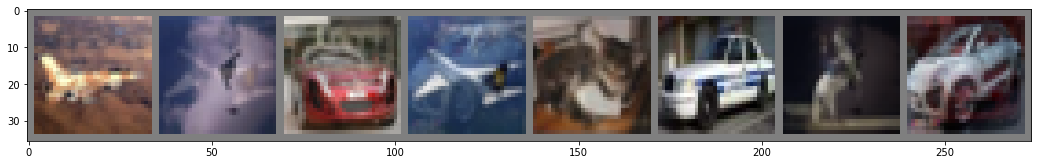

plane plane   cat   car horse   car plane   car
plane plane   car plane   cat   car horse   car
0.24999166226159364


In [33]:
# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()
lam, images, labels1, labels2 = mixup(images, labels, 'cpu')

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels1[j]] for j in range(8)))
print(' '.join('%5s' % classes[labels2[j]] for j in range(8)))
print(lam)